# import


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import tensorflow as tf
import os

# data input

In [ ]:
training_x = np.load('/content/drive/MyDrive/code/python/projects/ADL/ADL_(IM5062)/111ntu-homework3/training_x.npy')

In [ ]:
training_y = np.load('/content/drive/MyDrive/code/python/projects/ADL/ADL_(IM5062)/111ntu-homework3/training_y.npy')

# data process


In [ ]:
# create an Empty DataFrame object
df = pd.DataFrame(index=range(training_x.shape[0]),columns=range(14))
  
print(df)

       0    1    2    3    4    5    6    7    8    9    10   11   12   13
0     NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
1     NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
2     NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
3     NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
4     NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...
8755  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
8756  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
8757  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
8758  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
8759  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN

[8760 rows x 14 columns]


In [ ]:
for i in range(training_x.shape[0]):
  for j in range(13):
    df.iloc[i,j] = training_x[i][j].astype('float64')
  df.iloc[i,13] = training_y[i][0].astype('float64')

In [ ]:
df = df.rename({0: 'AMB_TEMP', 1: 'CO',2: 'NO',3: 'NO2',4: 'NOx',5: 'O3',6: 'PM10',7: 'RAINFALL',8: 'RH',9: 'SO2',10: 'THC',11: 'cos_wind',12: 'sin_wind',13: 'PM2.5',}, axis='columns')

In [ ]:
df 

,AMB_TEMP,CO,NO,NO2,NOx,O3,PM10,RAINFALL,RH,SO2,THC,cos_wind,sin_wind,PM2.5
0,14.333333,0.333333,7.666667,37.0,44.666667,12.333333,53.0,0.0,76.333333,1.666667,2.0,0.0,0.333333,34.0
1,14.0,0.333333,9.333333,34.333333,43.666667,14.333333,53.666667,0.0,78.0,4.666667,2.0,-0.333333,0.333333,37.0
2,14.0,0.333333,5.666667,36.666667,42.333333,14.666667,55.0,0.0,77.333333,4.0,2.0,0.0,0.666667,35.0
3,13.666667,0.666667,16.666667,37.333333,54.333333,12.333333,57.333333,0.0,78.666667,3.0,2.0,-0.333333,0.333333,32.0
4,13.333333,0.333333,6.333333,24.333333,30.666667,21.333333,54.333333,0.0,80.333333,2.0,2.0,0.333333,0.666667,31.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,16.0,0.333333,4.0,38.666667,43.0,23.666667,55.333333,0.0,61.666667,1.666667,1.0,0.0,2.0,31.0
8756,16.0,0.0,2.333333,33.333333,36.666667,27.333333,54.666667,0.0,62.333333,1.333333,1.0,0.0,2.333333,28.0
8757,16.0,0.0,2.0,29.333333,31.666667,32.666667,55.333333,0.0,61.666667,2.333333,1.0,0.0,3.0,30.0
8758,16.0,0.0,1.0,22.0,23.333333,39.666667,86.333333,0.0,63.666667,6.666667,2.0,0.666667,4.666667,49.0


In [ ]:
df.shape

(8760, 14)

In [ ]:
# For this case, let's assume that
# Given past 10 days observation, forecast the next 5 days observations. 
n_past = 8
n_future = 8 
n_features = 13

In [ ]:
train_df,val_df = df[:7008], df[7008:]  # 80% and 20%
train_df.shape,val_df .shape

((7008, 14), (1752, 14))

In [ ]:
train_df

,AMB_TEMP,CO,NO,NO2,NOx,O3,PM10,RAINFALL,RH,SO2,THC,cos_wind,sin_wind,PM2.5
0,14.333333,0.333333,7.666667,37.0,44.666667,12.333333,53.0,0.0,76.333333,1.666667,2.0,0.0,0.333333,34.0
1,14.0,0.333333,9.333333,34.333333,43.666667,14.333333,53.666667,0.0,78.0,4.666667,2.0,-0.333333,0.333333,37.0
2,14.0,0.333333,5.666667,36.666667,42.333333,14.666667,55.0,0.0,77.333333,4.0,2.0,0.0,0.666667,35.0
3,13.666667,0.666667,16.666667,37.333333,54.333333,12.333333,57.333333,0.0,78.666667,3.0,2.0,-0.333333,0.333333,32.0
4,13.333333,0.333333,6.333333,24.333333,30.666667,21.333333,54.333333,0.0,80.333333,2.0,2.0,0.333333,0.666667,31.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7003,24.333333,0.0,1.333333,10.0,11.666667,28.0,21.666667,0.0,75.666667,1.666667,1.0,0.0,2.333333,15.0
7004,24.0,0.0,1.333333,7.666667,9.0,31.0,23.666667,0.0,75.333333,1.0,1.0,0.0,2.333333,16.0
7005,24.0,0.0,1.0,7.666667,9.0,30.333333,25.0,0.0,76.0,1.0,1.0,0.0,2.0,12.0
7006,24.0,0.0,1.333333,8.0,10.333333,29.666667,26.333333,0.0,76.0,1.666667,1.0,0.333333,1.0,12.0


In [ ]:
train = train_df
# scalers={}

for i in train_df.columns:
    # scaler = MinMaxScaler(feature_range=(-1,1))
    # s_s = scaler.fit_transform(train[i].values.reshape(-1,1))
    ss = train_df[i].values
    # print(ss)
    ss = ss.reshape((len(train[i]), 1)).astype('float64')
    ss=np.reshape(ss,len(ss))
    # scalers['scaler_'+ i] = scaler
    train[i]=ss

val = val_df
for i in train_df.columns:
    # scaler = scalers['scaler_'+i]
    # s_s = scaler.transform(val[i].values.reshape(-1,1))
    s_s = val_df[i].values
    s_s = s_s.reshape((len(val[i]), 1)).astype('float64')
    s_s=np.reshape(s_s,len(s_s))
    # scalers['scaler_'+i] = scaler
    val[i]=s_s

<ipython-input-12-3f76642ba238>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train[i]=ss
<ipython-input-12-3f76642ba238>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  val[i]=s_s


In [ ]:
train.head(20)

,AMB_TEMP,CO,NO,NO2,NOx,O3,PM10,RAINFALL,RH,SO2,THC,cos_wind,sin_wind,PM2.5
0,14.333333,0.333333,7.666667,37.000000,44.666667,12.333333,53.000000,0.0,76.333333,1.666667,2.0,0.000000,0.333333,34.0
1,14.000000,0.333333,9.333333,34.333333,43.666667,14.333333,53.666667,0.0,78.000000,4.666667,2.0,-0.333333,0.333333,37.0
2,14.000000,0.333333,5.666667,36.666667,42.333333,14.666667,55.000000,0.0,77.333333,4.000000,2.0,0.000000,0.666667,35.0
3,13.666667,0.666667,16.666667,37.333333,54.333333,12.333333,57.333333,0.0,78.666667,3.000000,2.0,-0.333333,0.333333,32.0
4,13.333333,0.333333,6.333333,24.333333,30.666667,21.333333,54.333333,0.0,80.333333,2.000000,2.0,0.333333,0.666667,31.0
5,13.333333,0.333333,12.000000,24.666667,37.333333,22.000000,49.666667,0.0,81.000000,2.666667,2.0,0.000000,0.666667,29.0
6,13.333333,0.333333,28.000000,27.666667,55.666667,21.000000,49.333333,0.0,81.666667,6.666667,2.0,-0.333333,0.333333,29.0
7,13.666667,0.333333,22.666667,30.000000,53.000000,18.666667,53.333333,0.0,80.666667,8.000000,2.0,-0.333333,0.333333,37.0
8,15.000000,0.666667,15.333333,34.333333,50.000000,18.666667,57.333333,0.0,76.000000,6.000000,2.0,-0.333333,1.333333,38.0
9,17.666667,0.333333,12.333333,34.333333,47.333333,28.666667,62.000000,0.0,65.666667,4.666667,2.0,0.333333,2.666667,34.0


In [ ]:
def split_series(series, n_past, n_future):
  #
  # n_past ==> no of past observations
  #
  # n_future ==> no of future observations 
  #
  X, y = list(), list()
  for window_start in range(len(series)):
    past_end = window_start + n_past
    future_end = past_end + n_future + 1
    if future_end > len(series):
      break
    # slicing the past and future parts of the window
    past = series[window_start:past_end, :13]
    future = series[past_end + 1:future_end, 13]
    X.append(past)
    y.append(future)
  return np.array(X), np.array(y)

In [ ]:
X_train, y_train = split_series(train_df.values,n_past, n_future)
X_train.shape, y_train.shape

((6992, 8, 13), (6992, 8))

In [ ]:
X_train[0]

array([[14.33333333,  0.33333333,  7.66666667, 37.        , 44.66666667,
        12.33333333, 53.        ,  0.        , 76.33333333,  1.66666667,
         2.        ,  0.        ,  0.33333333],
       [14.        ,  0.33333333,  9.33333333, 34.33333333, 43.66666667,
        14.33333333, 53.66666667,  0.        , 78.        ,  4.66666667,
         2.        , -0.33333333,  0.33333333],
       [14.        ,  0.33333333,  5.66666667, 36.66666667, 42.33333333,
        14.66666667, 55.        ,  0.        , 77.33333333,  4.        ,
         2.        ,  0.        ,  0.66666667],
       [13.66666667,  0.66666667, 16.66666667, 37.33333333, 54.33333333,
        12.33333333, 57.33333333,  0.        , 78.66666667,  3.        ,
         2.        , -0.33333333,  0.33333333],
       [13.33333333,  0.33333333,  6.33333333, 24.33333333, 30.66666667,
        21.33333333, 54.33333333,  0.        , 80.33333333,  2.        ,
         2.        ,  0.33333333,  0.66666667],
       [13.33333333,  0.333333

In [ ]:
y_train[0]

array([34., 33., 31., 30., 33., 37., 36., 33.])

In [ ]:
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1],n_features))
print(X_train.shape)
y_train = y_train.reshape((y_train.shape[0],  y_train.shape[1],1))
print(y_train.shape)


(6992, 8, 13)
(6992, 8, 1)


In [ ]:
X_val, y_val = split_series(val_df.values,n_past, n_future)
X_val = X_val.reshape((X_val.shape[0], X_val.shape[1],n_features))
y_val = y_val.reshape((y_val.shape[0], y_val.shape[1],1))

# encoder & decoder

In [ ]:
# E1D1
# n_features ==> no of features at each timestep in the data.
#
encoder_inputs = tf.keras.layers.Input(shape=(n_past, n_features))
encoder_l1 = tf.keras.layers.LSTM(100, return_state=True)
encoder_outputs1 = encoder_l1(encoder_inputs)
encoder_states1 = encoder_outputs1[1:]
#
decoder_inputs = tf.keras.layers.RepeatVector(n_future)(encoder_outputs1[0])
#
decoder_l1 = tf.keras.layers.LSTM(100, return_sequences=True)(decoder_inputs,initial_state = encoder_states1)
decoder_outputs1 = tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(1))(decoder_l1)
#
model_e1d1 = tf.keras.models.Model(encoder_inputs,decoder_outputs1)
#
model_e1d1.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 8, 13)]      0           []                               
                                                                                                  
 lstm (LSTM)                    [(None, 100),        45600       ['input_1[0][0]']                
                                 (None, 100),                                                     
                                 (None, 100)]                                                     
                                                                                                  
 repeat_vector (RepeatVector)   (None, 8, 100)       0           ['lstm[0][0]']                   
                                                                                              

In [ ]:
# E2D2
# n_features ==> no of features at each timestep in the data.
#
encoder_inputs = tf.keras.layers.Input(shape=(n_past, n_features))
encoder_l1 = tf.keras.layers.LSTM(100,return_sequences = True, return_state=True)
encoder_outputs1 = encoder_l1(encoder_inputs)
encoder_states1 = encoder_outputs1[1:]
encoder_l2 = tf.keras.layers.LSTM(100, return_state=True)
encoder_outputs2 = encoder_l2(encoder_outputs1[0])
encoder_states2 = encoder_outputs2[1:]
#
decoder_inputs = tf.keras.layers.RepeatVector(n_future)(encoder_outputs2[0])
#
decoder_l1 = tf.keras.layers.LSTM(100, return_sequences=True)(decoder_inputs,initial_state = encoder_states1)
decoder_l2 = tf.keras.layers.LSTM(100, return_sequences=True)(decoder_l1,initial_state = encoder_states2)
decoder_outputs2 = tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(1))(decoder_l2)
#
model_e2d2 = tf.keras.models.Model(encoder_inputs,decoder_outputs2)
#
model_e2d2.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 8, 13)]      0           []                               
                                                                                                  
 lstm_2 (LSTM)                  [(None, 8, 100),     45600       ['input_2[0][0]']                
                                 (None, 100),                                                     
                                 (None, 100)]                                                     
                                                                                                  
 lstm_3 (LSTM)                  [(None, 100),        80400       ['lstm_2[0][0]']                 
                                 (None, 100),                                               

# train model


In [ ]:
reduce_lr = tf.keras.callbacks.LearningRateScheduler(lambda x: 1e-2 * 0.99 ** x)

model_e1d1.compile(optimizer=tf.keras.optimizers.Adam(), loss=tf.keras.losses.Huber())
history_e1d1=model_e1d1.fit(X_train,y_train,epochs=20,validation_data=(X_val,y_val),batch_size=32,verbose=1,callbacks=[reduce_lr])

model_e2d2.compile(optimizer=tf.keras.optimizers.Adam(), loss=tf.keras.losses.Huber())
history_e2d2=model_e2d2.fit(X_train,y_train,epochs=20,validation_data=(X_val,y_val),batch_size=32,verbose=1,callbacks=[reduce_lr])

Epoch 1/20
219/219 [==============================] - 8s 22ms/step - loss: 9.7550 - val_loss: 9.4203 - lr: 0.0100
Epoch 2/20
219/219 [==============================] - 4s 18ms/step - loss: 7.9639 - val_loss: 9.1490 - lr: 0.0099
Epoch 3/20
219/219 [==============================] - 4s 17ms/step - loss: 7.7193 - val_loss: 9.1550 - lr: 0.0098
Epoch 4/20
219/219 [==============================] - 4s 17ms/step - loss: 7.6698 - val_loss: 9.0685 - lr: 0.0097
Epoch 5/20
219/219 [==============================] - 4s 17ms/step - loss: 7.5954 - val_loss: 8.3741 - lr: 0.0096
Epoch 6/20
219/219 [==============================] - 4s 17ms/step - loss: 7.5168 - val_loss: 9.2819 - lr: 0.0095
Epoch 7/20
219/219 [==============================] - 4s 17ms/step - loss: 7.4834 - val_loss: 8.2114 - lr: 0.0094
Epoch 8/20
219/219 [==============================] - 4s 17ms/step - loss: 7.4722 - val_loss: 8.2221 - lr: 0.0093
Epoch 9/20
219/219 [==============================] - 4s 17ms/step - loss: 7.4887 - val_

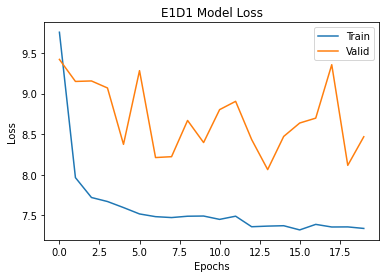

In [ ]:
plt.plot(history_e1d1.history['loss'])
plt.plot(history_e1d1.history['val_loss'])
plt.title("E1D1 Model Loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Valid'])
plt.show()

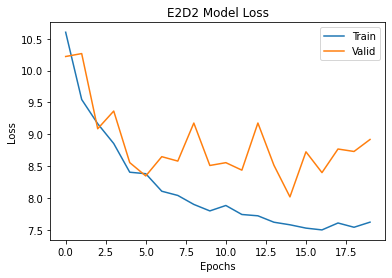

In [ ]:
plt.plot(history_e2d2.history['loss'])
plt.plot(history_e2d2.history['val_loss'])
plt.title("E2D2 Model Loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Valid'])
plt.show()

# testing


In [ ]:
testing_x = np.load('/content/drive/MyDrive/code/python/projects/ADL/ADL_(IM5062)/111ntu-homework3/testing_x.npy')

In [ ]:
# create an Empty DataFrame object
df_test = pd.DataFrame(index=range(testing_x.shape[0]),columns=range(13))
  
print(df_test)

       0    1    2    3    4    5    6    7    8    9    10   11   12
0     NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
1     NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
2     NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
3     NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
4     NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...
8755  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
8756  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
8757  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
8758  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
8759  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN

[8760 rows x 13 columns]


In [ ]:
for i in range(testing_x.shape[0]):
  for j in range(13):
    df_test.iloc[i,j] = testing_x[i][j]

In [ ]:
df_test = df_test.rename({0: 'AMB_TEMP', 1: 'CO',2: 'NO',3: 'NO2',4: 'NOx',5: 'O3',6: 'PM10',7: 'RAINFALL',8: 'RH',9: 'SO2',10: 'THC',11: 'cos_wind',12: 'sin_wind'}, axis='columns')

In [ ]:
df_test

,AMB_TEMP,CO,NO,NO2,NOx,O3,PM10,RAINFALL,RH,SO2,THC,cos_wind,sin_wind
0,15.0,0.0,0.666667,11.0,12.666667,42.0,159.333333,0.0,64.0,8.666667,2.0,1.333333,3.333333
1,14.666667,0.0,0.666667,11.0,12.666667,41.0,161.333333,0.0,63.666667,7.333333,2.0,0.666667,3.333333
2,14.0,0.0,0.666667,10.333333,12.333333,41.0,149.666667,0.0,64.333333,6.333333,2.0,1.0,3.0
3,14.0,0.0,0.666667,8.0,9.0,40.333333,135.666667,0.0,65.0,5.333333,1.0,0.666667,3.0
4,14.0,0.0,0.333333,7.333333,8.333333,39.666667,119.666667,0.0,65.333333,4.333333,1.0,0.666667,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,16.0,0.0,1.333333,14.333333,15.666667,56.666667,114.666667,0.0,67.0,4.333333,1.0,0.333333,3.333333
8756,16.0,0.0,0.666667,14.666667,16.0,53.0,115.0,0.0,68.666667,4.0,1.0,0.333333,3.333333
8757,16.0,0.0,0.666667,12.333333,13.666667,49.333333,110.0,0.0,70.333333,3.0,1.0,0.333333,3.333333
8758,16.0,0.0,1.0,12.0,13.333333,45.666667,100.333333,0.0,72.333333,3.0,1.0,0.333333,3.0


In [ ]:
test = df_test
for i in df_test.columns:
    # scaler = MinMaxScaler(feature_range=(-1,1))
    # s_s = scaler.fit_transform(test[i].values.reshape(-1,1))
    s_s = df_test[i].values
    s_s = s_s.reshape((len(test[i]), 1)).astype('float64')
    s_s=np.reshape(s_s,len(s_s))
    # scalers['scaler_'+ i] = scaler
    test[i]=s_s


In [ ]:
test.head(20)

,AMB_TEMP,CO,NO,NO2,NOx,O3,PM10,RAINFALL,RH,SO2,THC,cos_wind,sin_wind
0,15.000000,0.0,0.666667,11.000000,12.666667,42.000000,159.333333,0.0,64.000000,8.666667,2.0,1.333333,3.333333
1,14.666667,0.0,0.666667,11.000000,12.666667,41.000000,161.333333,0.0,63.666667,7.333333,2.0,0.666667,3.333333
2,14.000000,0.0,0.666667,10.333333,12.333333,41.000000,149.666667,0.0,64.333333,6.333333,2.0,1.000000,3.000000
3,14.000000,0.0,0.666667,8.000000,9.000000,40.333333,135.666667,0.0,65.000000,5.333333,1.0,0.666667,3.000000
4,14.000000,0.0,0.333333,7.333333,8.333333,39.666667,119.666667,0.0,65.333333,4.333333,1.0,0.666667,3.000000
5,13.000000,0.0,0.333333,8.000000,8.333333,38.333333,108.333333,0.0,64.333333,4.333333,1.0,0.666667,2.666667
6,13.000000,0.0,0.666667,10.000000,11.000000,34.666667,102.333333,0.0,64.333333,5.000000,1.0,0.666667,3.000000
7,13.000000,0.0,1.000000,11.333333,13.000000,31.666667,101.666667,0.0,62.666667,5.333333,1.0,0.666667,3.000000
8,13.000000,0.0,1.000000,10.000000,12.000000,32.000000,106.000000,0.0,59.333333,5.333333,1.0,1.333333,3.333333
9,13.333333,0.0,1.666667,9.666667,11.666667,34.333333,105.000000,0.0,56.000000,4.666667,1.0,0.333333,4.000000


In [ ]:
test.shape

(8760, 13)

In [ ]:
def testing_series(series, n_past, n_future):
  X = list()
  for window_start in range(len(series)):
    past_end = window_start + n_past
    future_end = past_end + n_future + 1
    if future_end > len(series):
      break
    # slicing the past and future parts of the window
    past = series[window_start:past_end, :]
    X.append(past)
  return np.array(X)

In [ ]:
X_test = testing_series(df_test.values,n_past, n_future)

In [ ]:
X_test.shape

(8744, 8, 13)

In [ ]:
X_test[0]

array([[ 15.        ,   0.        ,   0.66666667,  11.        ,
         12.66666667,  42.        , 159.33333333,   0.        ,
         64.        ,   8.66666667,   2.        ,   1.33333333,
          3.33333333],
       [ 14.66666667,   0.        ,   0.66666667,  11.        ,
         12.66666667,  41.        , 161.33333333,   0.        ,
         63.66666667,   7.33333333,   2.        ,   0.66666667,
          3.33333333],
       [ 14.        ,   0.        ,   0.66666667,  10.33333333,
         12.33333333,  41.        , 149.66666667,   0.        ,
         64.33333333,   6.33333333,   2.        ,   1.        ,
          3.        ],
       [ 14.        ,   0.        ,   0.66666667,   8.        ,
          9.        ,  40.33333333, 135.66666667,   0.        ,
         65.        ,   5.33333333,   1.        ,   0.66666667,
          3.        ],
       [ 14.        ,   0.        ,   0.33333333,   7.33333333,
          8.33333333,  39.66666667, 119.66666667,   0.        ,
         65.

In [ ]:
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1],n_features))
print(X_test.shape)

(8744, 8, 13)


In [ ]:
pred1_e1d1=model_e1d1.predict(X_test)
pred1_e2d2=model_e2d2.predict(X_test)



274/274 [==============================] - 5s 10ms/step


In [ ]:
pred1_e1d1.shape

(8744, 8, 1)

In [ ]:
pred1_e1d1

array([[[50.565094],
        [51.985046],
        [50.841743],
        ...,
        [50.345993],
        [49.796654],
        [47.732845]],

       [[53.070995],
        [54.526   ],
        [53.33187 ],
        ...,
        [52.80237 ],
        [52.25305 ],
        [50.189148]],

       [[50.486206],
        [51.9044  ],
        [50.76375 ],
        ...,
        [50.269684],
        [49.720333],
        [47.656506]],

       ...,

       [[44.776077],
        [44.72281 ],
        [42.059654],
        ...,
        [39.303925],
        [39.3412  ],
        [39.431446]],

       [[44.948166],
        [45.369396],
        [44.191246],
        ...,
        [40.37532 ],
        [40.877724],
        [41.473557]],

       [[47.01076 ],
        [47.683132],
        [46.60665 ],
        ...,
        [46.345642],
        [46.248753],
        [46.343647]]], dtype=float32)

In [ ]:
pred1_e2d2.shape

(8744, 8, 1)

In [ ]:
pred1_e2d2

array([[[51.47434 ],
        [51.280445],
        [50.491615],
        ...,
        [48.644554],
        [46.48052 ],
        [43.015636]],

       [[51.167828],
        [51.124405],
        [50.423397],
        ...,
        [48.599052],
        [46.431995],
        [42.952763]],

       [[50.931526],
        [51.00213 ],
        [50.378754],
        ...,
        [48.57608 ],
        [46.406963],
        [42.91881 ]],

       ...,

       [[32.219807],
        [27.180593],
        [25.118135],
        ...,
        [24.444267],
        [24.821537],
        [25.404867]],

       [[45.733227],
        [43.33038 ],
        [40.023632],
        ...,
        [38.472294],
        [40.29629 ],
        [39.463146]],

       [[45.371887],
        [43.069805],
        [40.665375],
        ...,
        [40.377594],
        [40.794075],
        [39.32893 ]]], dtype=float32)

In [ ]:
pred1_e2d2[0]

array([[51.47434 ],
       [51.280445],
       [50.491615],
       [50.47008 ],
       [50.135757],
       [48.644554],
       [46.48052 ],
       [43.015636]], dtype=float32)

In [ ]:
pred1_e2d2[0][0]

array([51.47434], dtype=float32)

In [ ]:
pred1_e2d2[0][1][0]

51.280445

In [ ]:
k = 8744


# output


In [ ]:

# create an Empty DataFrame object
ans_df_1 = pd.DataFrame(index=range(k),columns=range(8))
ans_df_2 = pd.DataFrame(index=range(k),columns=range(8))
print(ans_df_1)
print(ans_df_2)

        0    1    2    3    4    5    6    7
0     NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
1     NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
2     NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
3     NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
4     NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
...   ...  ...  ...  ...  ...  ...  ...  ...
8739  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
8740  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
8741  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
8742  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
8743  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN

[8744 rows x 8 columns]
        0    1    2    3    4    5    6    7
0     NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
1     NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
2     NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
3     NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
4     NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
...   ...  ...  ...  ...  ...  ...  ...  ...
8739  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
8740  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
8741  NaN  NaN  NaN  NaN  NaN 

In [ ]:
for i in range(k):
  for j in range(8):
    ans_df_1.iloc[i,j] = pred1_e1d1[i][j][0]
    ans_df_2.iloc[i,j] = pred1_e2d2[i][j][0]



In [ ]:
import torch
torch.save(model_e1d1, 'hw3_seq2seq_1_1.pt')
torch.save(model_e2d2, 'hw3_seq2seq_2_1.pt')

In [ ]:
import os
ans_df_1.rename(columns = {0:'PM2.5-1'}, inplace = True)
ans_df_1.rename(columns = {1:'PM2.5-2'}, inplace = True)
ans_df_1.rename(columns = {2:'PM2.5-3'}, inplace = True)
ans_df_1.rename(columns = {3:'PM2.5-4'}, inplace = True)
ans_df_1.rename(columns = {4:'PM2.5-5'}, inplace = True)
ans_df_1.rename(columns = {5:'PM2.5-6'}, inplace = True)
ans_df_1.rename(columns = {6:'PM2.5-7'}, inplace = True)
ans_df_1.rename(columns = {7:'PM2.5-8'}, inplace = True)

ans_df_2.rename(columns = {0:'PM2.5-1'}, inplace = True)
ans_df_2.rename(columns = {1:'PM2.5-2'}, inplace = True)
ans_df_2.rename(columns = {2:'PM2.5-3'}, inplace = True)
ans_df_2.rename(columns = {3:'PM2.5-4'}, inplace = True)
ans_df_2.rename(columns = {4:'PM2.5-5'}, inplace = True)
ans_df_2.rename(columns = {5:'PM2.5-6'}, inplace = True)
ans_df_2.rename(columns = {6:'PM2.5-7'}, inplace = True)
ans_df_2.rename(columns = {7:'PM2.5-8'}, inplace = True)

ans_df_1.to_csv(os.path.join('/content/drive/MyDrive/code/python/projects/ADL/ADL_(IM5062)/111ntu-homework3','ans_seq2seq_1_1.csv')) #save to file
ans_df_2.to_csv(os.path.join('/content/drive/MyDrive/code/python/projects/ADL/ADL_(IM5062)/111ntu-homework3','ans_seq2seq_2_1.csv')) #save to file

In [ ]:
df1 = pd.read_csv('/content/drive/MyDrive/code/python/projects/ADL/ADL_(IM5062)/111ntu-homework3/ans_seq2seq_1_1.csv')
df2 = pd.read_csv('/content/drive/MyDrive/code/python/projects/ADL/ADL_(IM5062)/111ntu-homework3/ans_seq2seq_2_1.csv')

In [ ]:
df1

,Unnamed: 0,PM2.5-1,PM2.5-2,PM2.5-3,PM2.5-4,PM2.5-5,PM2.5-6,PM2.5-7,PM2.5-8
0,0,50.565094,51.985046,50.841743,50.500645,50.437010,50.345993,49.796654,47.732845
1,1,53.070995,54.526000,53.331870,52.962510,52.893980,52.802370,52.253050,50.189148
2,2,50.486206,51.904400,50.763750,50.424057,50.360676,50.269684,49.720333,47.656506
3,3,50.275864,51.689170,50.555860,50.220036,50.157322,50.066303,49.516230,47.451187
4,4,50.258920,51.672210,50.540962,50.206140,50.143597,50.052578,49.502365,47.437088
...,...,...,...,...,...,...,...,...,...
8739,8739,32.177353,30.784271,29.999530,29.753498,29.710716,29.705334,29.705292,29.705969
8740,8740,37.051760,36.988990,35.119770,34.427948,34.265274,34.239190,34.236347,34.236740
8741,8741,44.776077,44.722810,42.059654,39.903540,39.362976,39.303925,39.341200,39.431446
8742,8742,44.948166,45.369396,44.191246,42.051070,40.354313,40.375320,40.877724,41.473557


In [ ]:
df2 

,Unnamed: 0,PM2.5-1,PM2.5-2,PM2.5-3,PM2.5-4,PM2.5-5,PM2.5-6,PM2.5-7,PM2.5-8
0,0,51.474340,51.280445,50.491615,50.470080,50.135757,48.644554,46.480520,43.015636
1,1,51.167828,51.124405,50.423397,50.423897,50.092460,48.599052,46.431995,42.952763
2,2,50.931526,51.002130,50.378754,50.399490,50.071003,48.576080,46.406963,42.918810
3,3,49.952904,50.348812,50.164480,50.317852,50.001580,48.480470,46.316460,42.812176
4,4,49.942375,50.342200,50.167465,50.334580,50.084915,48.703297,46.471540,42.901905
...,...,...,...,...,...,...,...,...,...
8739,8739,24.683450,23.882300,23.707235,23.609420,22.925957,21.916200,21.488869,21.062933
8740,8740,29.667873,24.823114,24.007187,23.897297,23.868061,23.753580,23.199917,22.087616
8741,8741,32.219807,27.180593,25.118135,24.478260,24.379710,24.444267,24.821537,25.404867
8742,8742,45.733227,43.330380,40.023632,37.349674,36.881924,38.472294,40.296290,39.463146


In [ ]:
df1.rename(columns = {'Unnamed: 0':'INDEX'}, inplace = True)
df1['INDEX'] = df1['INDEX']+1
df2.rename(columns = {'Unnamed: 0':'INDEX'}, inplace = True)
df2['INDEX'] = df2['INDEX']+1

In [ ]:
df1

,INDEX,PM2.5-1,PM2.5-2,PM2.5-3,PM2.5-4,PM2.5-5,PM2.5-6,PM2.5-7,PM2.5-8
0,1,50.565094,51.985046,50.841743,50.500645,50.437010,50.345993,49.796654,47.732845
1,2,53.070995,54.526000,53.331870,52.962510,52.893980,52.802370,52.253050,50.189148
2,3,50.486206,51.904400,50.763750,50.424057,50.360676,50.269684,49.720333,47.656506
3,4,50.275864,51.689170,50.555860,50.220036,50.157322,50.066303,49.516230,47.451187
4,5,50.258920,51.672210,50.540962,50.206140,50.143597,50.052578,49.502365,47.437088
...,...,...,...,...,...,...,...,...,...
8739,8740,32.177353,30.784271,29.999530,29.753498,29.710716,29.705334,29.705292,29.705969
8740,8741,37.051760,36.988990,35.119770,34.427948,34.265274,34.239190,34.236347,34.236740
8741,8742,44.776077,44.722810,42.059654,39.903540,39.362976,39.303925,39.341200,39.431446
8742,8743,44.948166,45.369396,44.191246,42.051070,40.354313,40.375320,40.877724,41.473557


In [ ]:
df1.to_csv(os.path.join('/content/drive/MyDrive/code/python/projects/ADL/ADL_(IM5062)/111ntu-homework3','ans_seq2seq_1_1.csv'),index=False) #save to file
df2.to_csv(os.path.join('/content/drive/MyDrive/code/python/projects/ADL/ADL_(IM5062)/111ntu-homework3','ans_seq2seq_2_1.csv'),index=False) #save to file